## 1. Data Acquisition

The dataset contains the features of the patients who came to the hospital's emergency department. This data is obtained from the [link](https://figshare.com/articles/dataset/Triage_accuracy_and_causes_of_mistriage_using_the_Korean_Triage_and_Acuity_Scale/9779267?file=17515730) in order to make a triage analysis of patients who came to the emergency department.



Using the demographic and medical symptoms of the patients, we will prioritize them and perform triage, or segmentation, using the clustering method.

Triage is the process of sorting people based on their need for immediate medical treatment as compared to their chance of benefiting from such care.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
file=('/content/pone.0216972.s001.xlsx')
data=pd.read_excel(file) 
data.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71.0,3,3,2,right ocular pain,1,1,2.0,160,100,84,18,36.6,100,2,Corneal abrasion,1,4,2,86.0,5.000000,1
1,1,1,56.0,12,3,2,right forearm burn,1,1,2.0,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64.0,3.950000,1
2,2,1,67.5,8,2,2,"arm pain, Lt",1,1,2.0,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862.0,1.000000,1
3,1,2,71.0,8,1,1,ascites tapping,1,1,3.0,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108.0,9.833333,1
4,1,2,58.0,4,3,1,"distension, abd",1,1,3.0,91,67,93,18,36.5,NaN,4,Ascites,1,5,8,109.0,6.600000,1


## 2. Data Exploration

The dataset consists of 1267 observations (patients) with 24 features.The main goal of this study is to determine the real-time status priority correctly and to group the patients based on their vital signs and demographic features

Also this dataset is used to identify emergency department triage accuracy using the Korean Triage and Acuity Scale (KTAS) and evaluate the causes of mistriage.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   int64  
 1   Sex                       1267 non-null   int64  
 2   Age                       1267 non-null   float64
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   int64  
 5   Injury                    1267 non-null   int64  
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   int64  
 8   Pain                      1267 non-null   int64  
 9   NRS_pain                  711 non-null    float64
 10  SBP                       1267 non-null   object 
 11  DBP                       1267 non-null   object 
 12  HR                        1267 non-null   object 
 13  RR                        1267 non-null   object 
 14  BT      

Explanation of Features of the dataset :

- Group: 1: Local ED / 2: Regional ED (ED: emergency department)
- Sex: 1: Female / 2: Male
- Age: Age of the patient
- Patients number per hour : Patients number/hour
- Arrival mode: The patient's arrival type 
(1: Walking / 2: 119 use / 3: Private car / 4: Private ambulance /
 5: Public transfotation (Police ets) /6: Wheelchair / 7: Others)
- Injury: 1: Non-injury / 2: Injury
- Chief_complain: The patient's main complaint
- Mental: Mental state of the patient (1: Alert / 2: Verbal response / 3: Pain response / 4: Unconciousness)
- Pain: The patient's pain (0: Pain / 1: Non-pain)
- NRS_pain: Numeric rating scales of pain (scaling : 1-10)
- SBP: Systolid blood pressure (120 - 130 mmHg)
- DBP: Diastolic blood pressure (70 - 90 mmHg)
- HR: Heart rate of the patient
- RR: Respiration rate of the patient
- BT: Body temperature of the patient (ideal 36.5° C - 37.2° C )
- Saturation: Oxygen saturation in the blood (SPO2 value)
- KTAS_RN: KTAS result of nurses in ED (the value of triage and scale)
  ( 1: Resuscitation , 2: Emergent , 3: Urgent, 4: Less Urgent, 5: Non urgent )
- Diagnosis in ED: patient diagnosis in ED
- Disposition: patient disposition (1: Discharge / 2: Ward admission / 3: ICU (Intensive care unit)admission / 4: AMA (Against medical advice) discharge / 5: Transfer / 6: Death / 7: OP fom ED)
- KTAS_expert: KTAS result of experts. ( 1: Resuscitation , 2: Emergent , 3: Urgent, 4: Less Urgent, 5: Non urgent )
- Error_group: 1: Vital sign / 2: Physical exam / 3: Psychatric /4: Pain / 5: Mental / 6: Underlying disease / 7: Medical records of other ED / 8: On set / 9: Others
- Length of stay_min: Total length of stay of the patient (minutes)
- KTAS duration_min: the time the patient spent in KTAS (minutes)
- mistriage: Evaluation according to the triage specified in terms of nurse and expert (0: Correct / 1: Over triage / 2: Under triage)



## 3. Data Preprocessing


First, we can change the names of the columns in the dataset to make them more understandable and comprehensive.

In [4]:
data.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

In [5]:
# renaming column names
data=data.rename(columns={"Group" : "Group_ED", "Patients number per hour" : "Patients_number/hour", "Arrival mode" : "Arrival_Type", "Chief_complain" : "Main_Complaint", "Mental" : "Mental_State", "NRS_pain" : "NRS_Pain", "SBP" : "Systolid_BP", "DBP" : "Diastolic_BP", "HR": "Heart_Rate", "RR" : "Respiration_Rate", 
                            "BT" : "Body_Temperature", "KTAS_RN" : "KTAS_Nurse", "Diagnosis in ED" : "Patient_Diagnosis", "Disposition" : "Patient_Disposition", "KTAS_expert" : "KTAS_Expert", "Error_group" : "Error_Group", 
                          "Length of stay_min" : "Total_Stay_duration/min", "KTAS duration_min" : "KTAS_duration/min", "mistriage" : "Mistriage"})
data.columns

Index(['Group_ED', 'Sex', 'Age', 'Patients_number/hour', 'Arrival_Type',
       'Injury', 'Main_Complaint', 'Mental_State', 'Pain', 'NRS_Pain',
       'Systolid_BP', 'Diastolic_BP', 'Heart_Rate', 'Respiration_Rate',
       'Body_Temperature', 'Saturation', 'KTAS_Nurse', 'Patient_Diagnosis',
       'Patient_Disposition', 'KTAS_Expert', 'Error_Group',
       'Total_Stay_duration/min', 'KTAS_duration/min', 'Mistriage'],
      dtype='object')

In [6]:
data.head()

,Group_ED,Sex,Age,Patients_number/hour,Arrival_Type,Injury,Main_Complaint,Mental_State,Pain,NRS_Pain,Systolid_BP,Diastolic_BP,Heart_Rate,Respiration_Rate,Body_Temperature,Saturation,KTAS_Nurse,Patient_Diagnosis,Patient_Disposition,KTAS_Expert,Error_Group,Total_Stay_duration/min,KTAS_duration/min,Mistriage
0,2,2,71.0,3,3,2,right ocular pain,1,1,2.0,160,100,84,18,36.6,100,2,Corneal abrasion,1,4,2,86.0,5.000000,1
1,1,1,56.0,12,3,2,right forearm burn,1,1,2.0,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64.0,3.950000,1
2,2,1,67.5,8,2,2,"arm pain, Lt",1,1,2.0,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862.0,1.000000,1
3,1,2,71.0,8,1,1,ascites tapping,1,1,3.0,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108.0,9.833333,1
4,1,2,58.0,4,3,1,"distension, abd",1,1,3.0,91,67,93,18,36.5,NaN,4,Ascites,1,5,8,109.0,6.600000,1


#### 3.1 Handling NaN Values :

As always, we need to check for null values in the data.

In [7]:
data.isnull().sum()

Group_ED                     0
Sex                          0
Age                          0
Patients_number/hour         0
Arrival_Type                 0
Injury                       0
Main_Complaint               0
Mental_State                 0
Pain                         0
NRS_Pain                   556
Systolid_BP                  0
Diastolic_BP                 0
Heart_Rate                   0
Respiration_Rate             0
Body_Temperature             0
Saturation                 688
KTAS_Nurse                   0
Patient_Diagnosis            2
Patient_Disposition          0
KTAS_Expert                  0
Error_Group                  0
Total_Stay_duration/min      0
KTAS_duration/min            0
Mistriage                    0
dtype: int64

When we look for null values, the column **NRS_Pain** has 556 null values The **Saturation** column has 688 null values and **Patient_Diagnosis** has 2 null values.

For saturation column, we can calculate the most frequently recurring values that is the mode and then fill NaN values with this value. 

for NRS_pain column, there are 556 NaN values. NRS_pain means that Grading the patient's pain. This rating is actually a value that can be assigned by the verbal conversation of the nurse or doctor with the patient. For this reason, we do not know to assign a value based on which field in the data set for these null values. Also, since almost half of the total data set is null, let's not take any risk and remove this field from the data set.

In [8]:
data = data.drop(columns=['NRS_Pain'])

In [9]:
data['Saturation'] = data['Saturation'].fillna(data['Saturation'].mode()[0])

In [10]:
data.isnull().sum()

Group_ED                   0
Sex                        0
Age                        0
Patients_number/hour       0
Arrival_Type               0
Injury                     0
Main_Complaint             0
Mental_State               0
Pain                       0
Systolid_BP                0
Diastolic_BP               0
Heart_Rate                 0
Respiration_Rate           0
Body_Temperature           0
Saturation                 0
KTAS_Nurse                 0
Patient_Diagnosis          2
Patient_Disposition        0
KTAS_Expert                0
Error_Group                0
Total_Stay_duration/min    0
KTAS_duration/min          0
Mistriage                  0
dtype: int64

Now , we hae just two NaN values in the Patient_Diagnosis column. We can remove these two row from the dataset. Because, this column shows the patients diagnosis and we cannot guess what the diagnosis was for that patient in the emergency department.

In [11]:
data[data.isnull().any(axis=1)]

,Group_ED,Sex,Age,Patients_number/hour,Arrival_Type,Injury,Main_Complaint,Mental_State,Pain,Systolid_BP,Diastolic_BP,Heart_Rate,Respiration_Rate,Body_Temperature,Saturation,KTAS_Nurse,Patient_Diagnosis,Patient_Disposition,KTAS_Expert,Error_Group,Total_Stay_duration/min,KTAS_duration/min,Mistriage
140,2,2,72.6,8,3,1,dyspnea,1,0,140,80,86,24,36.4,89,3,NaN,1,2,2,518.0,2.0,2
701,2,2,58.0,8,3,2,"ocular pain, Lt.",1,1,160,100,84,20,36.5,97,4,NaN,1,4,0,193.0,3.0,0


In [12]:
data = data.drop(index=[140, 701])

In [13]:
data[data.isnull().any(axis=1)]

,Group_ED,Sex,Age,Patients_number/hour,Arrival_Type,Injury,Main_Complaint,Mental_State,Pain,Systolid_BP,Diastolic_BP,Heart_Rate,Respiration_Rate,Body_Temperature,Saturation,KTAS_Nurse,Patient_Diagnosis,Patient_Disposition,KTAS_Expert,Error_Group,Total_Stay_duration/min,KTAS_duration/min,Mistriage


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265 entries, 0 to 1266
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Group_ED                 1265 non-null   int64  
 1   Sex                      1265 non-null   int64  
 2   Age                      1265 non-null   float64
 3   Patients_number/hour     1265 non-null   int64  
 4   Arrival_Type             1265 non-null   int64  
 5   Injury                   1265 non-null   int64  
 6   Main_Complaint           1265 non-null   object 
 7   Mental_State             1265 non-null   int64  
 8   Pain                     1265 non-null   int64  
 9   Systolid_BP              1265 non-null   object 
 10  Diastolic_BP             1265 non-null   object 
 11  Heart_Rate               1265 non-null   object 
 12  Respiration_Rate         1265 non-null   object 
 13  Body_Temperature         1265 non-null   object 
 14  Saturation              

#### 3.2 Handling Non-English Values

Since the data set is obtained from hospitals in Korea, there are non-English values in the columns below. We can fill these values with null values and then find and fill in the most repeated values on the basis of those columns.

In [15]:
# function to remove non-ASCII 
def remove_non_ascii(Saturation): 
    return ''.join(i for i in Saturation if ord(i)<128) 
data["Saturation"] = data["Saturation"].apply(remove_non_ascii)

In [16]:
data.loc[data['Saturation'] == '']
data = data.replace({'': np.nan})

In [17]:
#filling NaN values with the mode
data['Saturation'] = data['Saturation'].fillna(data['Saturation'].mode()[0])

In [18]:
len(data[data.isnull().any(axis=1)])

0

In [19]:
# function to remove non-ASCII 
def remove_non_ascii(Main_Complaint): 
    return ''.join(i for i in Main_Complaint if ord(i)<128) 
data["Main_Complaint"] = data["Main_Complaint"].apply(remove_non_ascii)


In [20]:
data.loc[data['Main_Complaint'] == '']
data = data.replace({'': np.nan})

In [21]:
data[data.isnull().any(axis=1)]

,Group_ED,Sex,Age,Patients_number/hour,Arrival_Type,Injury,Main_Complaint,Mental_State,Pain,Systolid_BP,Diastolic_BP,Heart_Rate,Respiration_Rate,Body_Temperature,Saturation,KTAS_Nurse,Patient_Diagnosis,Patient_Disposition,KTAS_Expert,Error_Group,Total_Stay_duration/min,KTAS_duration/min,Mistriage
16,1,2,69.0,11,2,1,NaN,1,1,121,76,85,20,37.4,98,3,Acute gastroenteritis,1,4,1,363.0,10.533330,1
34,1,1,19.0,11,2,1,NaN,1,0,116,77,64,16,36.9,98,2,Acute gastritis,1,4,2,108.0,14.600000,1
38,1,2,47.0,10,2,2,NaN,1,0,141,95,76,18,36.6,98,3,Laceration of oral cavity,1,4,2,576.0,13.433330,1
190,1,1,78.0,6,2,1,NaN,1,1,측불,측불,측불,16,35.9,98,2,Chest pain,1,2,0,222.0,6.483333,0
378,1,1,61.0,5,3,1,NaN,1,1,90,53,109,16,37,98,5,Rash,2,5,0,291.0,6.916667,0
388,1,1,66.0,6,3,1,NaN,1,1,127,63,97,20,37.5,98,4,Acute gastroenteritis,1,4,0,155.0,8.383333,0
541,1,1,73.0,9,1,1,NaN,1,1,148,72,70,16,36.3,98,4,Herpes zoster,1,4,0,35.0,7.700000,0
844,1,1,22.0,13,3,1,NaN,1,0,99,65,74,20,36.6,98,4,Palpitation,1,4,0,163.0,5.066667,0
904,1,2,36.0,9,3,1,NaN,1,0,157,100,66,22,36,98,3,Dizziness,1,3,0,277.0,4.666667,0
927,1,2,43.0,11,3,1,NaN,1,0,126,81,86,20,36.8,98,4,Ureter stone,1,4,0,118.0,15.566670,0


In [22]:
#drop these NaN values
data = data.drop(index=[16, 34, 38, 190, 378, 388, 541, 844, 904, 927, 961])

In [23]:
len(data[data.isnull().any(axis=1)])

0

In [24]:
# function to remove non-ASCII 
def remove_non_ascii(Systolid_BP): 
    return ''.join(i for i in Systolid_BP if ord(i)<128) 
data["Systolid_BP"] = data["Systolid_BP"].apply(remove_non_ascii)

In [25]:
data.loc[data['Systolid_BP'] == '']
data = data.replace({'': np.nan})

In [26]:
data[data.isnull().any(axis=1)]

,Group_ED,Sex,Age,Patients_number/hour,Arrival_Type,Injury,Main_Complaint,Mental_State,Pain,Systolid_BP,Diastolic_BP,Heart_Rate,Respiration_Rate,Body_Temperature,Saturation,KTAS_Nurse,Patient_Diagnosis,Patient_Disposition,KTAS_Expert,Error_Group,Total_Stay_duration/min,KTAS_duration/min,Mistriage
61,2,1,69.6,8,2,1,dyspnea,2,1,NaN,측불,96,22,36.3,78,2,Dyspnoea,6,1,1,593.0,2.000000,2
121,1,2,48.0,5,2,1,dyspnea,1,0,NaN,측불,측불,측불,측불,98,2,Dyspnea,1,1,1,272.0,4.100000,2
150,1,2,77.0,4,3,1,mental change,3,0,NaN,측불,측불,측불,측불,98,2,End stage kidney disease on dialysis,2,1,4,323.0,13.900000,2
155,1,1,78.0,6,2,1,Motor weakness,4,0,NaN,측불,측불,측불,측불,98,2,Dysarthria,2,1,5,234.0,9.350000,2
161,1,1,77.0,5,4,1,melena,3,0,NaN,측불,측불,24,37.4,98,2,Hematochezia,3,1,7,351.0,4.416667,2
180,2,2,42.7,17,3,1,"erection, penile",1,0,NaN,측불,측불,측불,측불,98,5,Priapism,1,2,2,594.0,5.000000,2
354,1,2,56.0,10,2,1,both leg pain,2,1,NaN,측불,측불,측불,측불,98,5,Knee pain,1,5,0,545.0,3.866667,0
427,1,2,78.0,8,2,1,alcohol smell,1,1,NaN,측불,측불,측불,측불,98,4,Acute intoxication of alcohol,1,4,0,393.0,7.050000,0
705,2,2,60.6,8,4,2,abd pain,1,1,NaN,측불,측불,측불,측불,98,1,Contusion of abdomen wall,6,1,0,275.0,5.000000,0
787,1,1,81.0,11,4,1,sezure like motion,1,0,NaN,측불,118,28,37,98,3,Seizure,1,3,0,982.0,8.983334,0


When we look at the output of the above query, we will print null on the non-English values in the other Diastolic_BP, Heart_Rate, Respiration_Rate, Body_Temperature fields as opposed to the null value in the Systolid_BP field, so we can delete these data directly from the dataset.


In [27]:
data = data.dropna()

In [28]:
#checkin NaN values
len(data[data.isnull().any(axis=1)])

0

In [29]:
# function to remove non-ASCII 
def remove_non_ascii(Body_Temperature): 
    return ''.join(i for i in Body_Temperature if ord(i)<128) 
data["Body_Temperature"] = data["Body_Temperature"].apply(remove_non_ascii)


In [30]:
data.loc[data['Body_Temperature'] == '']


,Group_ED,Sex,Age,Patients_number/hour,Arrival_Type,Injury,Main_Complaint,Mental_State,Pain,Systolid_BP,Diastolic_BP,Heart_Rate,Respiration_Rate,Body_Temperature,Saturation,KTAS_Nurse,Patient_Diagnosis,Patient_Disposition,KTAS_Expert,Error_Group,Total_Stay_duration/min,KTAS_duration/min,Mistriage
122,1,1,50.0,9,3,1,"Blood Pressure, Low",3,0,50,33,37,28,,98,2,Colitis,3,1,1,496.0,6.4,2
123,1,1,50.0,9,3,1,"Blood Pressure, Low",3,0,50,33,37,28,,98,2,Hypotension,3,1,1,496.0,6.4,2


In [31]:
#replacing with NaN value
data = data.replace({'': np.nan})

In [32]:
data = data.dropna()

In [33]:
len(data[data.isnull().any(axis=1)])

0

In [34]:
# function to remove non-ASCII 
def remove_non_ascii(Diastolic_BP): 
    return ''.join(i for i in Diastolic_BP if ord(i)<128) 
data["Diastolic_BP"] = data["Diastolic_BP"].apply(remove_non_ascii)

In [35]:
data.loc[data['Diastolic_BP'] == '']
data = data.replace({'': np.nan})
data = data.dropna()

In [36]:
len(data[data.isnull().any(axis=1)])

0

In [37]:
def remove_non_ascii(Respiration_Rate): 
    return ''.join(i for i in Respiration_Rate if ord(i)<128) 
data["Respiration_Rate"] = data["Respiration_Rate"].apply(remove_non_ascii)

In [38]:
data.loc[data['Respiration_Rate'] == '']
data = data.replace({'': np.nan})
data = data.dropna()

#### 3.3 Data Transformation Operations

Most of the columns contain numeric values, but the ata type appears as object (character) in the dataset. We need to convert data typse to numeric or integer.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1266
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Group_ED                 1221 non-null   int64  
 1   Sex                      1221 non-null   int64  
 2   Age                      1221 non-null   float64
 3   Patients_number/hour     1221 non-null   int64  
 4   Arrival_Type             1221 non-null   int64  
 5   Injury                   1221 non-null   int64  
 6   Main_Complaint           1221 non-null   object 
 7   Mental_State             1221 non-null   int64  
 8   Pain                     1221 non-null   int64  
 9   Systolid_BP              1221 non-null   object 
 10  Diastolic_BP             1221 non-null   object 
 11  Heart_Rate               1221 non-null   object 
 12  Respiration_Rate         1221 non-null   object 
 13  Body_Temperature         1221 non-null   object 
 14  Saturation              

In [40]:
data['Age'] = data['Age'].astype(int)
data['Systolid_BP'] = data['Systolid_BP'].astype(float)
data['Diastolic_BP'] = data['Diastolic_BP'].astype(float)
data['Heart_Rate'] = data['Heart_Rate'].astype(int)
data['Respiration_Rate'] = data['Respiration_Rate'].astype(int)
data['Body_Temperature'] = data['Body_Temperature'].astype(float)
data['Saturation'] = data['Saturation'].astype(int)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1266
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Group_ED                 1221 non-null   int64  
 1   Sex                      1221 non-null   int64  
 2   Age                      1221 non-null   int64  
 3   Patients_number/hour     1221 non-null   int64  
 4   Arrival_Type             1221 non-null   int64  
 5   Injury                   1221 non-null   int64  
 6   Main_Complaint           1221 non-null   object 
 7   Mental_State             1221 non-null   int64  
 8   Pain                     1221 non-null   int64  
 9   Systolid_BP              1221 non-null   float64
 10  Diastolic_BP             1221 non-null   float64
 11  Heart_Rate               1221 non-null   int64  
 12  Respiration_Rate         1221 non-null   int64  
 13  Body_Temperature         1221 non-null   float64
 14  Saturation              

Now, our data is ready for making further analysis.

## 4. Data Visualization

#### 4.1 Distribution of Emergency Department Type

In [42]:
g=data.groupby(["Group_ED"], as_index = False).count()
g = g[["Group_ED", "Age"]]
g = g.rename(columns = {"Age" : "Count"})
g["percentage"] = g["Count"] / g["Count"].sum()
g1=g[["Group_ED","Count" ,"percentage"]]



In [43]:
type_ed = ["Local ED", "Regional ED"]
g1.insert(3, "TypeofName" , type_ed, True)
g1

,Group_ED,Count,percentage,TypeofName
0,1,658,0.538903,Local ED
1,2,563,0.461097,Regional ED


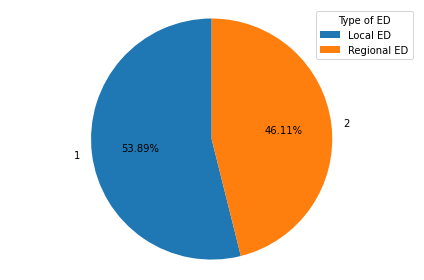

In [44]:
g2=g1[["Group_ED", "percentage", "TypeofName"]]
fig1, ax1 = plt.subplots()
ax1.pie(g2.percentage, labels=g2.Group_ED, autopct='%1.2f%%', startangle=90)
ax1.axis('equal')
plt.legend(g2.TypeofName, title='Type of ED' ,loc="upper right")
plt.tight_layout();

The pie chart show that 55.89 percent of emergency services are local and 46.11 percent are regional.

#### 4.2 Average Age of Patients by Gender

In [45]:
a=data.groupby(["Sex"], as_index = False)[["Age"]].mean()
gender = ["Female", "Male"]
a.insert(2, "Gender" , gender, True)
a

,Sex,Age,Gender
0,1,54.890223,Female
1,2,53.065831,Male


It can be said that the average of age is between 53-54. 

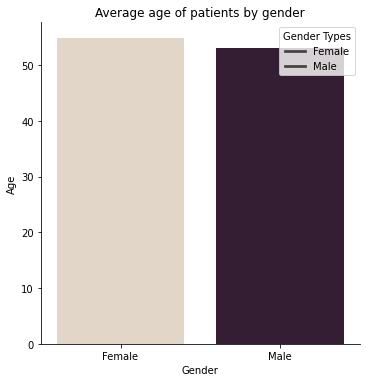

In [46]:
sns.catplot(x="Gender", y="Age", kind="bar", data=a, palette="ch:.25")
plt.legend(a["Gender"].unique(), title='Gender Types' ,loc="upper right")
plt.title("Average age of patients by gender")
plt.show()

#### 4.3 Types of Patients' Arrival in the Emergency Department

In [47]:
t =data.groupby(["Arrival_Type"], as_index = False).count()
t = t[["Arrival_Type", "Age"]]
t = t.rename(columns = {"Age" : "Count"})
t_type = ["Walking", "119 use", "Private car", "Private ambulance", "Public transf. (Police ets)", "Wheelchair", "Others"]
t.insert(2, "Arrival_name", t_type, True)
t = t.sort_values("Count", ascending= False)
t["percentage"] = t["Count"] / t["Count"].sum()
t

,Arrival_Type,Count,Arrival_name,percentage
2,3,737,Private car,0.603604
1,2,248,119 use,0.203112
3,4,144,Private ambulance,0.117936
0,1,78,Walking,0.063882
5,6,10,Wheelchair,0.008190
4,5,2,Public transf. (Police ets),0.001638
6,7,2,Others,0.001638


Overall, 733 (60%) patients, which was more than half, used a private vehicle.

<Figure size 1080x1080 with 0 Axes>

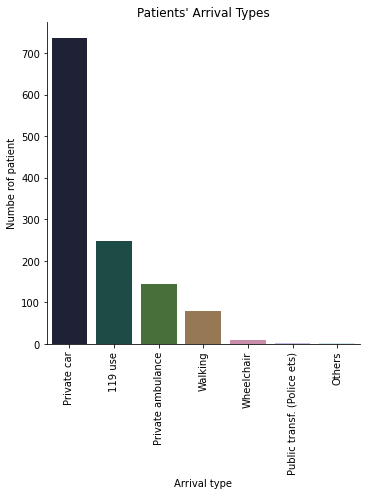

In [48]:
plt.figure(figsize=(15,15))
sns.catplot(x=t.Arrival_name, y=t.Count, kind="bar", data=t, palette="cubehelix",  dodge=False)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Patients' Arrival Types")
plt.xlabel("Arrival type")
plt.ylabel("Numbe rof patient")
plt.show();

#### 4.4 The Reason Patients Visit the Hospital

In [49]:
i=data.groupby(["Injury"], as_index = False).count()
i = i[["Injury", "Age"]]
i = i.rename(columns = {"Age" : "Count"})
i["percentage"] = i["Count"] / i["Count"].sum()
inj = ["Non-injury", "Injury"]
i.insert(3, "Injury_type" , inj, True)
i


,Injury,Count,percentage,Injury_type
0,1,986,0.807535,Non-injury
1,2,235,0.192465,Injury


In [50]:
plt.figure(figsize=(6,4))
fig = px.pie(i, values='percentage', names='Injury_type', color_discrete_sequence=px.colors.sequential.RdBu,
              width=800, height=400)
fig.show();


<Figure size 432x288 with 0 Axes>

The reason for visiting the emergency department was related to non-injurious incidents in 986 (80.8%) cases.

#### 4.5 Relationship Between Respiration Rate and Saturation

Respiration rate is the patients' breathing per minute (pulse) and the value should be between 10 and 20. Saturation means oxygen saturation in the blood.It must be 95 and above. There is an inverse relationship between the two. If the saturation is low, the respiration rate increases. Breathing rapidly as the need for breathing will increase.

In [51]:
s = data[["Respiration_Rate","Saturation"]]
s.head(5)

,Respiration_Rate,Saturation
0,18,100
1,20,98
2,20,98
3,20,98
4,18,98


In [52]:
fig = px.scatter(s, x="Respiration_Rate", y="Saturation",
                 width=600, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

#### 4.6 Average Number of Patients in hour

In [53]:
pt = data[["Patients_number/hour"]].mean()
pt

Patients_number/hour    7.492219
dtype: float64

In [54]:
data["Patients_number/hour"].describe()

count    1221.000000
mean        7.492219
std         3.145277
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        17.000000
Name: Patients_number/hour, dtype: float64

There is no significant difference in the number of patient visits per hour for triage accuracy (mean: 7.49, standard deviation: 3.145).

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.



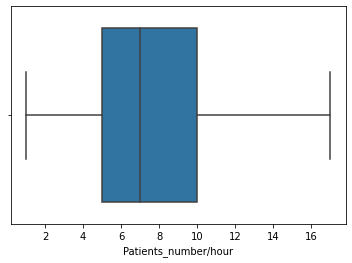

In [55]:
sns.boxplot(x = data["Patients_number/hour"], orient = "v");

#### 4.7 Grouping of Patients by Nurses and Experts After Triage


First graph shıws that the triage of patients by nurses in emergency department. The second graph shows that the triage scale by experts not in emergency department. 

In [56]:
n =data.groupby(["KTAS_Nurse"], as_index = False).count()
n = n[["KTAS_Nurse", "Age"]]
n = n.rename(columns = {"Age" : "Count"})

e =data.groupby(["KTAS_Expert"], as_index = False).count()
e = e[["KTAS_Expert", "Age"]]
e = e.rename(columns = {"Age" : "Count"})

The results of the comparison of the triage accuracy between the emergency nurses and the experts were as follows. 

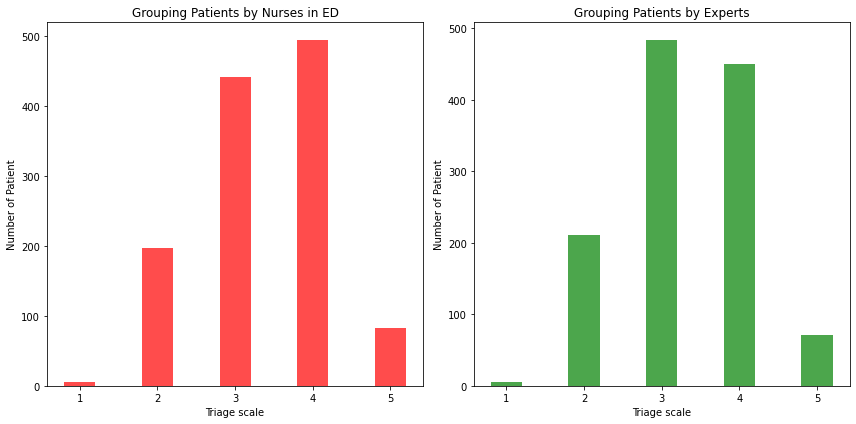

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(n.KTAS_Nurse, n.Count , data=n, color="r",alpha=0.7, width=0.4)
plt.xticks(rotation= 0)
plt.xlabel('Triage scale')
plt.ylabel('Number of Patient')
plt.title('Grouping Patients by Nurses in ED')
plt.tight_layout() 

 
plt.subplot(1,2,2)
plt.bar(e.KTAS_Expert, e.Count, data=n, color="g",alpha=0.7, width=0.4)
plt.xticks(rotation= 0)
plt.xlabel('Triage scale')
plt.ylabel('Number of Patient')
plt.title('Grouping Patients by Experts')
plt.tight_layout() 
plt.show();

Most of patients were triaged in levet 3 (Urgent), level 4 (Less Urgent).

The emergency nurses and experts agreed on a triage score in 1049 (85.9%) cases.
 

In [58]:
tr =data.groupby(["Mistriage"], as_index = False).count()
tr = tr[["Mistriage", "Age"]]
tr = tr.rename(columns = {"Age" : "Count"})
tr["percentage"] = tr["Count"] / tr["Count"].sum()
tr

,Mistriage,Count,percentage
0,0,1049,0.859132
1,1,52,0.042588
2,2,120,0.098280


#### 4.8 Patient Disposition Types After Treatment in ED 


In [59]:
d =data.groupby(["Patient_Disposition"], as_index = False).count()
d = d[["Patient_Disposition", "Age"]]
d = d.rename(columns = {"Age" : "Count"})
d["percentage"] = d["Count"] / d["Count"].sum()
disp = ["Discharge", "Ward admission", "ICU admission", "AMA discharg", "Transfer", "Death", "OP fom ED"]
d.insert(3, "Type_of_Disposition" , disp, True)
d.sort_values("Count", ascending=False)


,Patient_Disposition,Count,percentage,Type_of_Disposition
0,1,778,0.637183,Discharge
1,2,361,0.295659,Ward admission
4,5,29,0.023751,Transfer
3,4,25,0.020475,AMA discharg
6,7,21,0.017199,OP fom ED
2,3,4,0.003276,ICU admission
5,6,3,0.002457,Death


After treatment in the emergency department, 728 (63.7%) patients were discharged and 361 (29.6%) patients were admitted to the wards.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



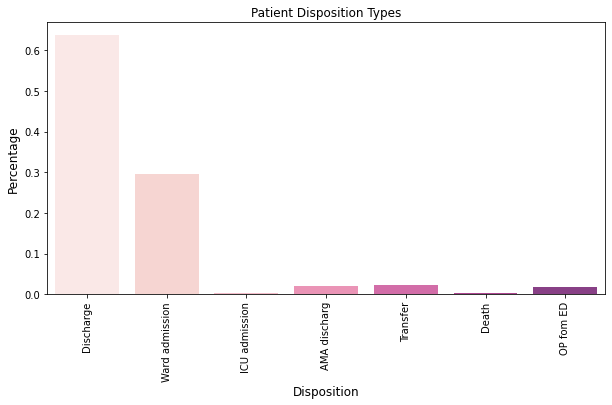

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(d.Type_of_Disposition, d.percentage, palette='RdPu' ,alpha=0.8)
plt.title("Patient Disposition Types")
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Disposition", fontsize=12)
plt.xticks(rotation=90, horizontalalignment="center")
plt.show();

 ## 5. Data analysis with statistics

#### 5.1 Descriptive Statistics

We can select only numeric variables from dataset and examine the descriptive statistic values like mean, median, quartile etc.

In [61]:
df = data[["Age","Patients_number/hour", "Systolid_BP", "Diastolic_BP", "Heart_Rate", "Respiration_Rate", "Body_Temperature","Saturation" , "Total_Stay_duration/min", "KTAS_duration/min"]]
df.head()

,Age,Patients_number/hour,Systolid_BP,Diastolic_BP,Heart_Rate,Respiration_Rate,Body_Temperature,Saturation,Total_Stay_duration/min,KTAS_duration/min
0,71,3,160.0,100.0,84,18,36.6,100,86.0,5.000000
1,56,12,137.0,75.0,60,20,36.5,98,64.0,3.950000
2,67,8,130.0,80.0,102,20,36.6,98,862.0,1.000000
3,71,8,139.0,94.0,88,20,36.5,98,108.0,9.833333
4,58,4,91.0,67.0,93,18,36.5,98,109.0,6.600000


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1221.0,53.936937,19.786528,15.000000,36.0,56.0,71.0,95.00000
Patients_number/hour,1221.0,7.492219,3.145277,1.000000,5.0,7.0,10.0,17.00000
Systolid_BP,1221.0,134.043407,26.902872,65.000000,114.0,130.0,150.0,275.00000
Diastolic_BP,1221.0,79.889435,15.057923,31.000000,70.0,80.0,90.0,160.00000
Heart_Rate,1221.0,83.957412,16.516157,32.000000,72.0,81.0,96.0,148.00000
Respiration_Rate,1221.0,19.479115,1.945722,14.000000,18.0,20.0,20.0,30.00000
Body_Temperature,1221.0,36.579034,0.544001,35.000000,36.2,36.5,36.8,41.00000
Saturation,1221.0,97.598690,2.912010,20.000000,98.0,98.0,98.0,100.00000
Total_Stay_duration/min,1221.0,11395.886179,81922.081182,0.026713,133.0,274.0,620.0,709510.00000
KTAS_duration/min,1221.0,5.472563,3.453053,1.000000,3.0,4.2,7.0,17.36667


#### 5.2 Correlation Matrix


We will construct this correlation matrix by the end of this analysis

Each row and column represents a variable, and each value in this matrix is the **correlation coefficient** between the variables represented by the corresponding row and column.

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship between various variables and make decisions accordingly.

Each cell in the correlation matrix is a ‘correlation coefficient‘ between the two variables corresponding to the row and column of the cell.

Text(0.5, 1.0, 'Correlation matrix of Triage Data')

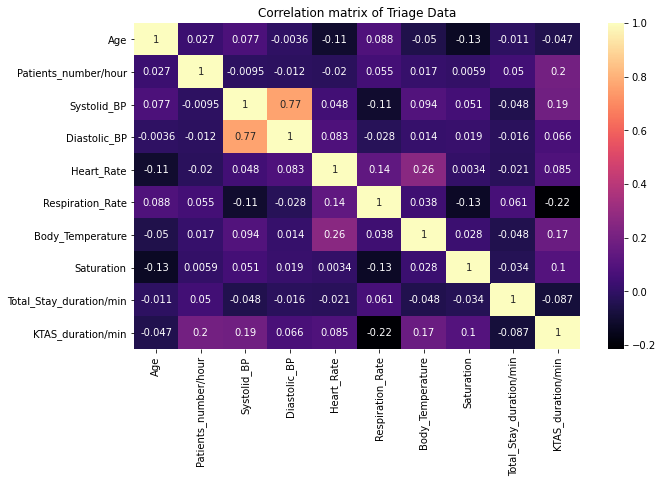

In [63]:
cor = df.corr()
pos=0
plt.figure(figsize=(10,6))
sns.heatmap(cor, xticklabels = cor.columns, yticklabels=cor.columns, annot=True, cmap='magma')
plt.title("Correlation matrix of Triage Data")

The value 0.00034 indicates there doesn’t exist a relationship between Saturaiton and Heart_Rate variables. 

The value 0.77 shows that there is a relationship between Diastolic_BP and Systolid_BP.

## 6. Data Segmentation with Clustering Methods

#### K-Means Clustering Algorithm

The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity


In the project there are  five-level triage scale.So it should be 5 clusters.

KMeans(n_clusters = 5): n_clusters = 5 means that create 5 cluster.

( 1: Resuscitation , 2: Emergent , 3: Urgent, 4: Less Urgent, 5: Non urgent )

In [64]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [65]:
y = data["KTAS_Nurse"]
x_data = data.drop(["Group_ED", "KTAS_Nurse", "KTAS_Expert", "Mistriage", "Main_Complaint","Patient_Diagnosis", "Total_Stay_duration/min", "KTAS_duration/min"],axis=1)

In [66]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [67]:
# train test split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [68]:
x_train.shape

(854, 15)

In [69]:
y_train.shape

(854,)

In [70]:
#traning data
kmeans = KNeighborsClassifier(n_neighbors = 5)
kmeans.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
#predicting data
prediction = kmeans.predict(x_test)
prediction

array([4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 2, 3, 4, 3, 3, 3, 3, 4,
       3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4,
       3, 2, 3, 2, 4, 3, 4, 3, 2, 3, 3, 4, 4, 2, 4, 2, 3, 4, 4, 4, 3, 3,
       3, 4, 3, 4, 2, 3, 4, 2, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 4, 3, 4, 4,
       4, 3, 4, 4, 4, 4, 2, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 2, 3, 4,
       3, 3, 3, 2, 3, 4, 4, 4, 4, 3, 3, 3, 4, 2, 3, 3, 4, 1, 4, 3, 2, 4,
       3, 4, 4, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 5, 4, 2, 4, 3, 3, 4,
       2, 4, 4, 2, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4,
       3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 2, 4, 3, 5, 4, 4, 3, 4, 3,
       4, 4, 4, 3, 3, 2, 4, 3, 4, 3, 4, 4, 3, 2, 3, 3, 4, 4, 4, 3, 2, 3,
       2, 3, 4, 5, 3, 4, 4, 4, 4, 4, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 4,
       3, 4, 4, 4, 3, 2, 4, 4, 4, 2, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 4, 2, 4, 3, 4, 3, 2, 5, 3, 4, 2, 3, 5, 4, 3, 3, 4, 3, 3,
       4, 3, 5, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3,

In [72]:
print(" {} nn score: {} ".format(5, kmeans.score(x_test, y_test)))

 5 nn score: 0.47956403269754766 


In [73]:
real_pred = pd.DataFrame({'KTAS_Nurse': np.array(y_test).flatten(), 'KTAS_Predicted': prediction.flatten()})
real_pred.head()

,KTAS_Nurse,KTAS_Predicted
0,2,4
1,3,4
2,5,3
3,3,3
4,3,4


The predictive power of the model 48%. We can say that this value is quite low.We can say that the variables we put into the model for this reason.Variable selection should be made with a specialist about the data and after the expert opinion is received, the process should be done to improve the predictive power of the model, such as hyper parameter tuning.